## Machine Learning A-Z™: Hands-On Python & R In Data Science

### Kirill Eremenko, Hadelin de Ponteves, SuperDataScience Team

https://www.udemy.com/machinelearning/

Part 2: Data Preprocessing Template

**Section 7: Support Vector Regression**

Scenario: 
- Company wants to hire new candidate and needs to predict salary based on level of position
- Candidate said his previous salary was 160K
- Predict if candidate statement this is true
- Build a lie detector

---
**Support Vector Regression**

- A type of support vector machne that support both linear and non linear reg
- performs linear regression in a higher dimensional space
- Correlation matrix
- Linear regression: goal is to minize error of prediction
- SVR: goal is to ensure that error do not exceed threshold
---

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
# Importing the dataset
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values

In [3]:
#let's take a look at the dataset
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
# Fitting the Support Vector Regression Model to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x,y)

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [8]:
# Predicting a new result
y_pred = regressor.predict([[6.5]])
print(y_pred)

[130001.55760156]


---
**Answer:** 130K, too high!

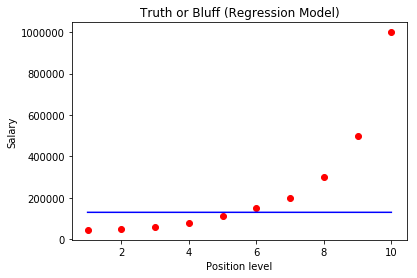

In [9]:
## let's isualize the data
# Visualising the Regression results
plt.scatter(x, y, color = 'red')
plt.plot(x, regressor.predict(x), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

hmm, we need feature scaling....

---

In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y.reshape(-1, 1)) #reshape into an array

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [11]:
#fit the SVR to data
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x,y)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

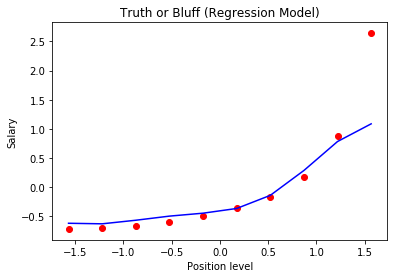

In [12]:
# Visualising the Regression results
plt.scatter(x, y, color = 'red')
plt.plot(x, regressor.predict(x), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

observation: SVR is fitting better to observation. The ceo salary is an outlier

---

In [13]:
## Predict a new result with *nonlinear* regression
# we need to transform the x value
## apply the inverse scalar object
#y_pred2 = regressor.predict([[6.5]])
#print(y_pred2)

y_pred2 = sc_y.inverse_transform(regressor.predict(sc_x.transform(np.array([[6.5]]))))
print(y_pred2)

[170370.0204065]


**Answer:** 170K, quite close!

---

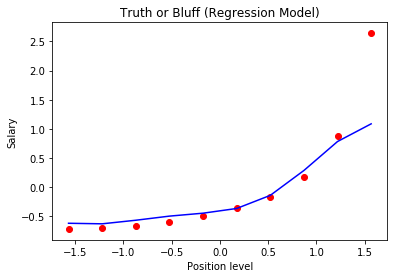

In [15]:
# Visualising the Regression results
plt.scatter(x, y, color = 'red')
plt.plot(x, regressor.predict(x), color = 'blue')
plt.title('Truth or Bluff (Regression Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

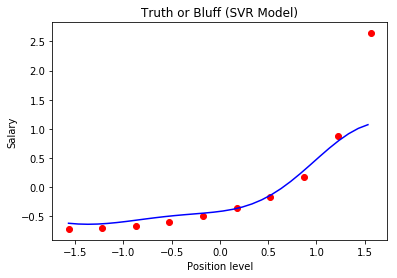

In [16]:
# Visualising the SVR results (for higher resolution and smoother curve)
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x, y, color = 'red')
plt.plot(x_grid, regressor.predict(x_grid), color = 'blue')
plt.title('Truth or Bluff (SVR Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

---
**Overall:** model closely predicts salary, but we need our prediction to be as close as possible